In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/nifty500-stocks-dataset")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 34.8k/34.8k [00:00<00:00, 217kB/s]


Extracting files...
Path to dataset files: C:\Users\Jatin\.cache\kagglehub\datasets\iamsouravbanerjee\nifty500-stocks-dataset\versions\8


In [7]:
df = pd.read_csv("C:\\Users\\Jatin\\Downloads\\Suransh\\nifty_500.csv")
df.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

In [9]:
df.shape


(501, 17)

In [10]:
df.dtypes

Company Name                  object
Symbol                        object
Industry                      object
Series                        object
Open                         float64
High                         float64
Low                          float64
Previous Close               float64
Last Traded Price            float64
Change                        object
Percentage Change             object
Share Volume                   int64
Value (Indian Rupee)         float64
52 Week High                 float64
52 Week Low                  float64
365 Day Percentage Change     object
30 Day Percentage Change      object
dtype: object

In [11]:
df.columns

Index(['Company Name', 'Symbol', 'Industry', 'Series', 'Open', 'High', 'Low',
       'Previous Close', 'Last Traded Price', 'Change', 'Percentage Change',
       'Share Volume', 'Value (Indian Rupee)', '52 Week High', '52 Week Low',
       '365 Day Percentage Change', '30 Day Percentage Change'],
      dtype='object')

In [12]:
from tqdm import tqdm

In [13]:
df.loc[df['Percentage Change']=="-",'Percentage Change']= np.nan

In [14]:
df['Percentage Change'].astype(float)

0     -1.28
1     -0.95
2     -3.59
3     -0.91
4      2.34
       ... 
496   -0.77
497   -0.47
498    3.99
499    1.96
500   -0.60
Name: Percentage Change, Length: 501, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          498 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

In [16]:
object_dtype = df.select_dtypes(include=object)
object_dtype.columns

Index(['Company Name', 'Symbol', 'Industry', 'Series', 'Change',
       'Percentage Change', '365 Day Percentage Change',
       '30 Day Percentage Change'],
      dtype='object')

In [17]:
num_dtype = df.select_dtypes(exclude=object)
num_dtype.columns

Index(['Open', 'High', 'Low', 'Previous Close', 'Last Traded Price',
       'Share Volume', 'Value (Indian Rupee)', '52 Week High', '52 Week Low'],
      dtype='object')

In [18]:
df.describe()

,Open,High,Low,Previous Close,Last Traded Price,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02,5.010000e+02,501.000000,501.000000
mean,1525.904491,1553.804990,1504.042415,1528.061277,1536.925449,2.580350e+06,8.635146e+08,2182.632196,1281.628982
std,4466.627117,4576.377692,4435.492332,4477.209376,4532.004734,9.407021e+06,4.335973e+09,5728.930152,3850.529646
min,6.750000,6.950000,6.700000,6.850000,6.800000,1.507000e+03,2.587223e+06,13.100000,4.550000
25%,215.300000,221.550000,210.600000,217.200000,214.650000,7.740500e+04,4.502265e+07,328.700000,166.800000
50%,551.100000,569.100000,547.000000,554.750000,563.000000,3.296100e+05,1.533133e+08,818.000000,438.050000
75%,1404.500000,1421.250000,1396.850000,1411.700000,1410.000000,1.235612e+06,6.644570e+08,2096.750000,1128.800000
max,70300.000000,72500.000000,70300.000000,70800.900000,71900.000000,1.257883e+08,9.211987e+10,87550.000000,63000.000000


In [19]:
df.duplicated().sum()

0

In [20]:
df.isna().any()

Company Name                 False
Symbol                       False
Industry                     False
Series                       False
Open                         False
High                         False
Low                          False
Previous Close               False
Last Traded Price            False
Change                       False
Percentage Change             True
Share Volume                 False
Value (Indian Rupee)         False
52 Week High                 False
52 Week Low                  False
365 Day Percentage Change    False
30 Day Percentage Change     False
dtype: bool

<Axes: >

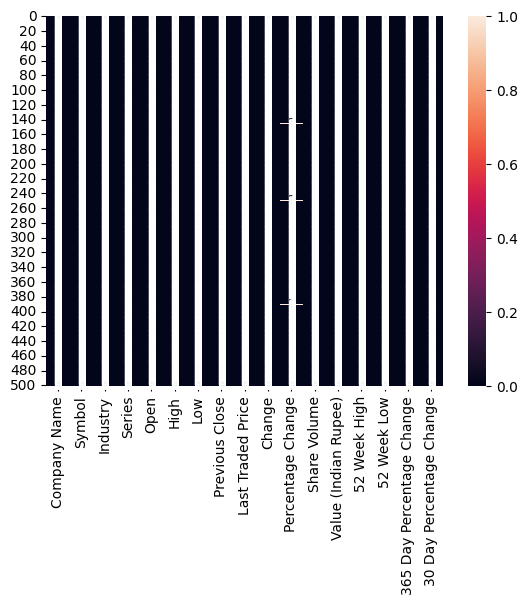

In [21]:
sns.heatmap(df.isna(),annot=True)

In [22]:
df.nunique()

Company Name                 501
Symbol                       501
Industry                      21
Series                         2
Open                         492
High                         495
Low                          493
Previous Close               495
Last Traded Price            493
Change                       372
Percentage Change            353
Share Volume                 501
Value (Indian Rupee)         501
52 Week High                 497
52 Week Low                  494
365 Day Percentage Change    441
30 Day Percentage Change     458
dtype: int64

In [23]:
df.drop(columns=['Symbol','Series'],inplace=True)

In [24]:
df.columns

Index(['Company Name', 'Industry', 'Open', 'High', 'Low', 'Previous Close',
       'Last Traded Price', 'Change', 'Percentage Change', 'Share Volume',
       'Value (Indian Rupee)', '52 Week High', '52 Week Low',
       '365 Day Percentage Change', '30 Day Percentage Change'],
      dtype='object')

[[ 0  0]
 [ 1  0]
 [ 2  0]
 [ 3  0]
 [ 4  0]
 [ 5  0]
 [ 6  0]
 [ 7  0]
 [ 8  0]
 [ 9  0]
 [10  0]
 [11  0]
 [12  0]
 [13  0]
 [14  0]
 [15  0]
 [16  0]
 [17  0]
 [18  0]
 [19  0]
 [20  0]] ['Diversified', 'Healthcare', 'Financial Services', 'Capital Goods', 'Consumer Services', 'Construction Materials', 'Metals & Mining', 'Power', 'Services', 'Fast Moving Consumer Goods', 'Oil Gas & Consumable Fuels', 'Information Technology', 'Chemicals', 'Textiles', 'Automobile and Auto Components', 'Consumer Durables', 'Telecommunication', 'Realty', 'Forest Materials', 'Construction', 'Media Entertainment & Publication']


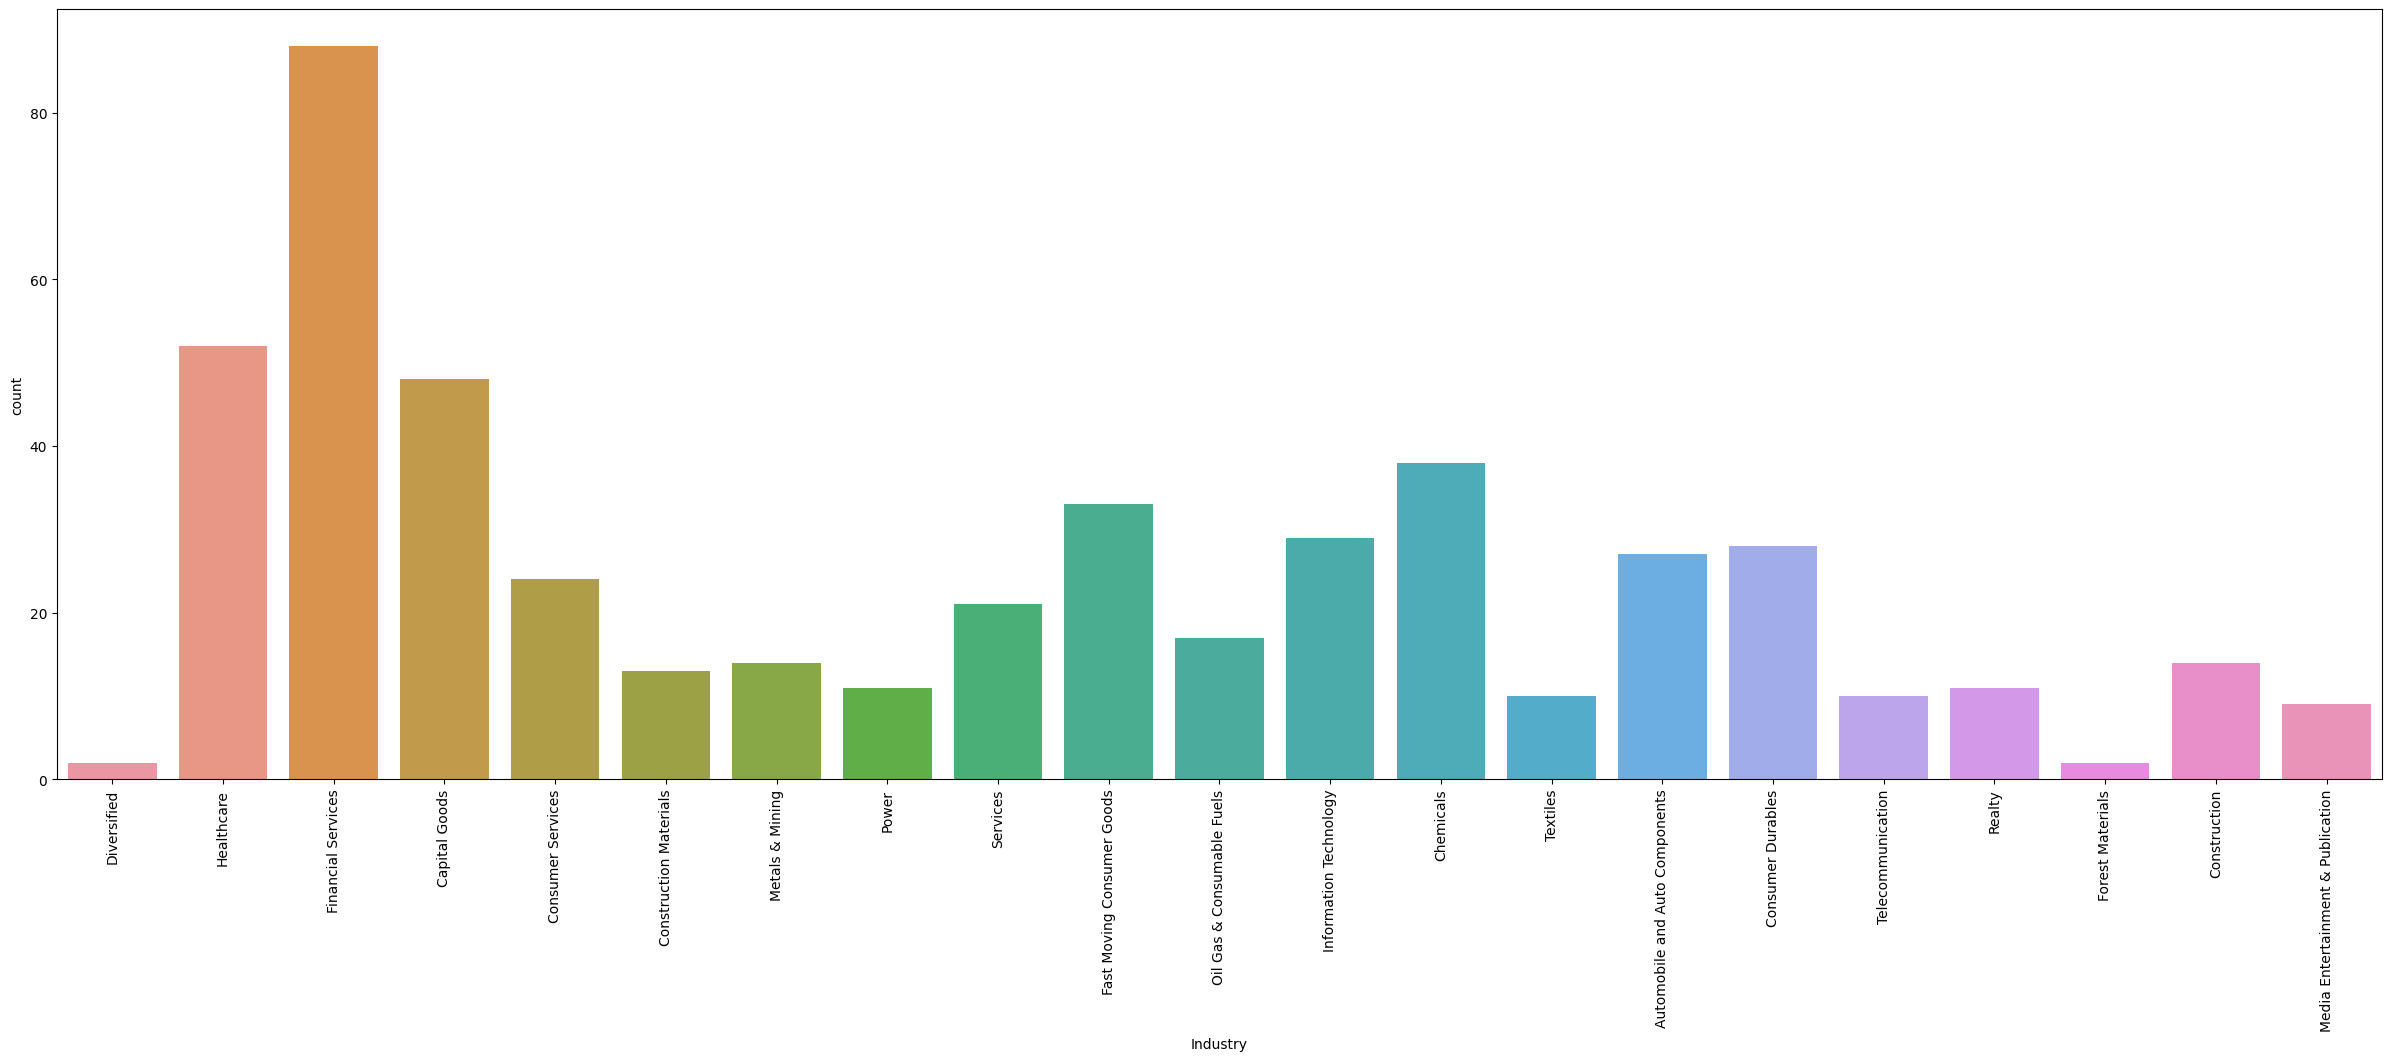

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import numpy for array creation

plt.figure(figsize=(30, 10))
ax = sns.countplot(data=df, x='Industry')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Retrieve tick positions and labels
tick_positions, tick_labels = plt.xticks()

# Display the positions and labels as an array and list
positions_array = np.array([tick.get_position() for tick in tick_labels])
labels_list = [tick.get_text() for tick in tick_labels]

print(positions_array, labels_list)

plt.show()


<Axes: >

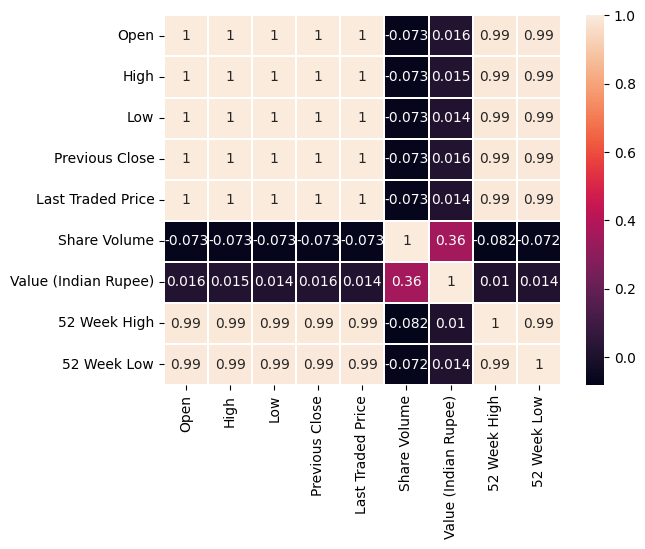

In [26]:
sns.heatmap(df.corr(),annot=True,linewidths=0.2)

In [27]:
df.groupby(['Industry']).agg({ 'Open':[np.mean, np.median],'High':[np.mean, np.median],'Low':[np.mean, np.median],'Previous Close':[np.mean, np.median],'Last Traded Price':[np.mean, np.median]})

Open                     High  \
                                           mean     median          mean   
Industry                                                                   
Automobile and Auto Components      4686.357407    925.000   4805.753704   
Capital Goods                       2023.683333    779.450   2043.246875   
Chemicals                           1653.782895    916.900   1677.843421   
Construction                         330.100000    216.750    332.957143   
Construction Materials              2640.884615    874.900   2683.861538   
Consumer Durables                   1233.205357    925.350   1254.112500   
Consumer Services                    968.502083    505.125    980.156250   
Diversified                        11445.750000  11445.750  11476.675000   
Fast Moving Consumer Goods          1674.628788    525.500   1710.254545   
Financial Services                   799.367045    413.575    820.278977   
Forest Materials                     553.000000    553.000    563.850000   
Healthcare                          1565.975962    628.500   1591.922115   
Information Technology              1637.731034    997.000   1655.579310   
Media Entertainment & Publication    461.472222    362.900    470.227778   
Metals & Mining                      399.625000    233.550    407.957143   
Oil Gas & Consumable Fuels           509.114706    218.000    517.217647   
Power                                530.095455    202.700    544.522727   
Realty                               592.168182    498.300    608.472727   
Services                            1035.950000    474.000   1049.730952   
Telecommunication                    357.950000    134.950    365.585000   
Textiles                            4662.745000    390.725   4806.150000   

                                                       Low             \
                                      median          mean     median   
Industry                                                                
Automobile and Auto Components       947.000   4656.305556    900.000   
Capital Goods                        788.275   1982.681250    767.175   
Chemicals                            925.750   1622.730263    891.575   
Construction                         220.525    324.575000    213.375   
Construction Materials               877.100   2611.669231    826.000   
Consumer Durables                    934.375   1216.071429    911.500   
Consumer Services                    526.500    949.131250    499.275   
Diversified                        11476.675  11031.075000  11031.075   
Fast Moving Consumer Goods           532.550   1661.478788    513.000   
Financial Services                   418.150    788.560227    406.000   
Forest Materials                     563.850    547.025000    547.025   
Healthcare                           637.450   1548.542308    622.350   
Information Technology              1004.000   1606.179310    980.300   
Media Entertainment & Publication    368.950    451.922222    353.650   
Metals & Mining                      236.300    392.725000    225.675   
Oil Gas & Consumable Fuels           222.400    489.620588    214.800   
Power                                207.650    501.059091    199.000   
Realty                               514.000    585.318182    491.550   
Services                             474.000   1019.664286    455.000   
Telecommunication                    136.400    353.430000    131.775   
Textiles                             394.825   4637.955000    384.300   

                                  Previous Close            Last Traded Price  \
                                            mean     median              mean   
Industry                                                                        
Automobile and Auto Components       4707.981481    923.150       4759.355556   
Capital Goods                        2018.906250    783.425       2009.814583   
Chemicals                            1655.544737    913.100 

In [28]:
df.groupby(['Industry']).agg({ 'Value (Indian Rupee)':[np.mean]})

,Value (Indian Rupee)
,mean
Industry,
Automobile and Auto Components,9.584557e+08
Capital Goods,2.629504e+08
Chemicals,3.017017e+08
Construction,1.801224e+08
Construction Materials,4.451913e+08
Consumer Durables,6.549041e+08
Consumer Services,7.753057e+08
Diversified,5.731713e+07


<Axes: xlabel='Industry'>

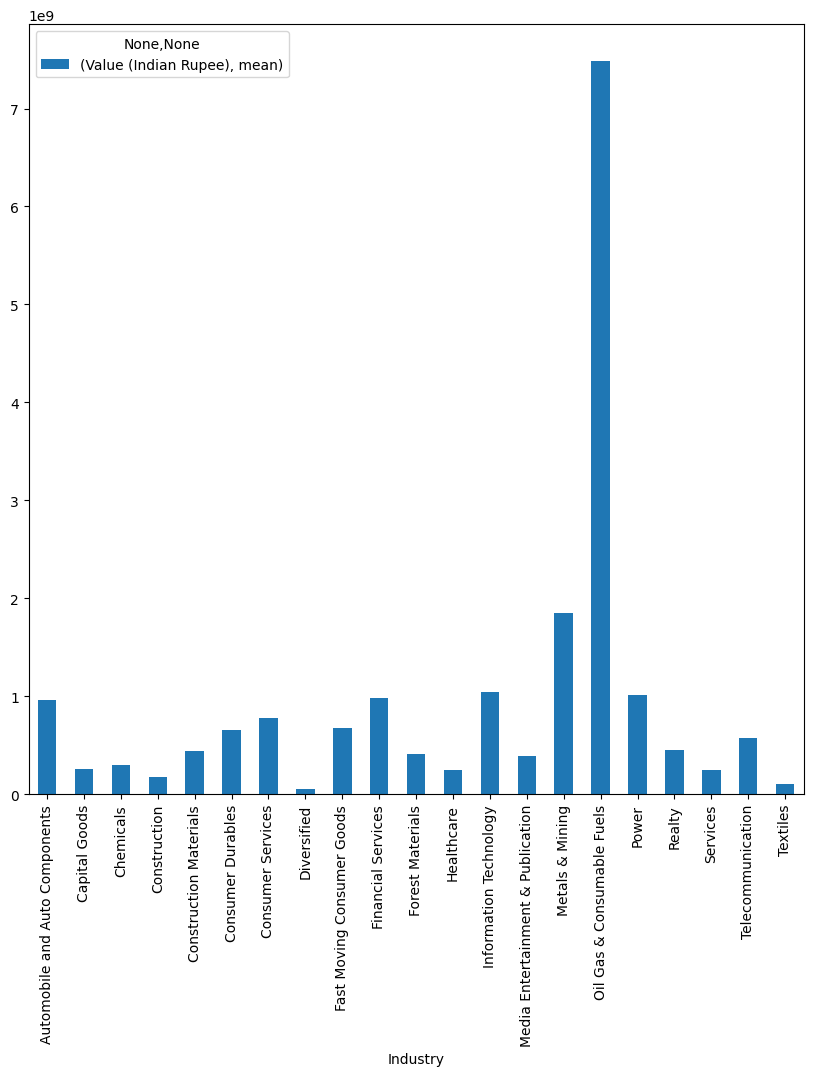

In [29]:
df.groupby(['Industry']).agg({ 'Value (Indian Rupee)':[np.mean]}).plot(kind="bar",figsize=(10,10))

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_accuracy(y_true, y_pred, threshold=0.1):
    """
    Calculate regression accuracy based on relative error threshold
    """
    return np.mean(np.abs((y_true - y_pred) / y_true) <= threshold)

def regression_f1_score(y_true, y_pred, threshold=0.1):
    """
    Calculate precision, recall, and F1 score for regression predictions
    using different criteria for precision and recall
    """
    # Calculate absolute errors
    abs_errors = np.abs(y_pred - y_true)
    rel_errors = np.abs((y_true - y_pred) / y_true)
    
    # Define different thresholds for precision and recall
    precision_threshold = threshold
    recall_threshold = threshold * 1.2  # More lenient for recall
    
    # Precision: Focus on accuracy of predictions for high-value targets
    high_value_mask = y_true > np.median(y_true)
    precision = np.mean(rel_errors[high_value_mask] <= precision_threshold)
    
    # Recall: Overall prediction accuracy across all values
    recall = np.mean(rel_errors <= recall_threshold)
    
    # Calculate F1 score
    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
        
    return precision, recall, f1

def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluate model performance and print results
    """
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = regression_accuracy(y_test, y_pred)
    precision, recall, f1 = regression_f1_score(y_test, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return {
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }



# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Prepare features and target
X = df.drop(columns=['Previous Close'])
y = df['Previous Close']

# Scale features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    'Decision Tree': DecisionTreeRegressor(
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test, name)

# Compare models
print("\nModel Comparison:")
metrics = ['mse', 'mae', 'r2', 'accuracy', 'precision', 'recall', 'f1']
comparison_df = pd.DataFrame(results).round(4)
print(comparison_df)

# Find best model for each metric
print("\nBest Models per Metric:")
for metric in metrics:
    if metric in ['mse', 'mae']:  # Lower is better
        best_model = min(results.items(), key=lambda x: x[1][metric])[0]
    else:  # Higher is better
        best_model = max(results.items(), key=lambda x: x[1][metric])[0]
    print(f"{metric.upper()}: {best_model}")


Training Random Forest...

Random Forest Results:
MSE: 50148.9378
MAE: 60.8710
R-squared: 0.9951
Accuracy: 0.9604
Precision: 0.9800
Recall: 0.9901
F1 Score: 0.9850

Training Gradient Boosting...

Gradient Boosting Results:
MSE: 222504.5609
MAE: 103.6953
R-squared: 0.9783
Accuracy: 0.9109
Precision: 0.9600
Recall: 0.9307
F1 Score: 0.9451

Training Decision Tree...

Decision Tree Results:
MSE: 228531.9906
MAE: 122.7950
R-squared: 0.9777
Accuracy: 0.9406
Precision: 0.9200
Recall: 0.9505
F1 Score: 0.9350

Model Comparison:
           Random Forest  Gradient Boosting  Decision Tree
mse           50148.9378        222504.5609    228531.9906
mae              60.8710           103.6953       122.7950
r2                0.9951             0.9783         0.9777
accuracy          0.9604             0.9109         0.9406
precision         0.9800             0.9600         0.9200
recall            0.9901             0.9307         0.9505
f1                0.9850             0.9451         0.9350

B

In [63]:
import pandas as pd
import numpy as np

def create_advanced_features(df):
    # Create a copy to avoid modifying the original dataframe
    df_copy = df.copy()
    
    # Percentage change features
    df_copy['daily_return'] = df_copy['Last Traded Price'].pct_change().fillna(0)
    
    # Moving averages
    df_copy['volume_ma_7'] = df_copy['Share Volume'].rolling(window=7, min_periods=1).mean()
    df_copy['price_ma_14'] = df_copy['Last Traded Price'].rolling(window=14, min_periods=1).mean()
    
    # Relative strength index (RSI)
    def calculate_rsi(prices, window=14):
        delta = prices.diff()
        
        # Separate gains and losses
        gain = delta.clip(lower=0)
        loss = -delta.clip(upper=0)
        
        # Calculate average gains and losses
        avg_gain = gain.rolling(window=window, min_periods=1).mean()
        avg_loss = loss.rolling(window=window, min_periods=1).mean()
        
        # Calculate relative strength
        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))
        
        return rsi
    
    df_copy['rsi_14'] = calculate_rsi(df_copy['Last Traded Price'])
    
    # Additional features
    df_copy['price_volatility'] = df_copy['Last Traded Price'].rolling(window=14, min_periods=1).std()
    df_copy['volume_change_ratio'] = df_copy['Share Volume'] / df_copy['Share Volume'].rolling(window=7, min_periods=1).mean()
    
    return df_copy

# Example usage
def apply_feature_engineering(df):
    # Perform label encoding if not already done
    from sklearn.preprocessing import LabelEncoder
    
    # Encode categorical columns
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
    
    # Add advanced features
    enhanced_df = create_advanced_features(df)
    
    return enhanced_df

# If you want to see the results
enhanced_dataframe = apply_feature_engineering(df)
print(enhanced_dataframe.head())

                             Company Name  Industry      Open     High  \
index--p5bJXXpQgvPz6yvQMFiy                                              
199                                   202         8   2226.00   2293.0   
200                                   203        14    246.00    249.0   
201                                   189         1   3320.00   3447.9   
202                                   205         9    746.95    748.0   
203                                   206         1  34069.80  34069.8   

                                  Low  Previous Close  Last Traded Price  \
index--p5bJXXpQgvPz6yvQMFiy                                                
199                           2203.60         2230.60            2291.00   
200                            245.35          249.35             247.75   
201                           3252.40         3295.20            3410.00   
202                            726.05          743.70             733.95   
203                      

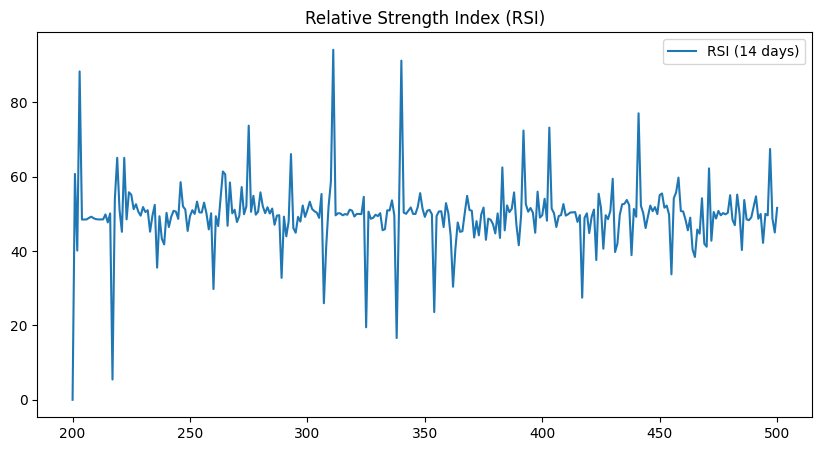

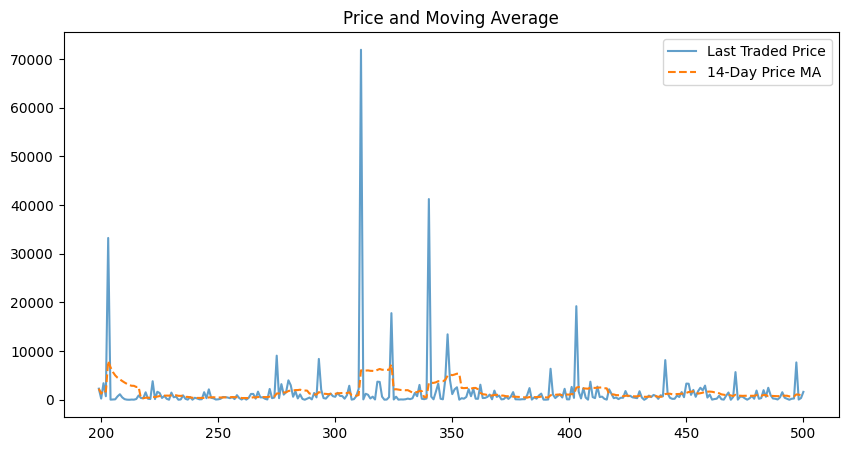

In [65]:
import matplotlib.pyplot as plt

def visualize_features(df):
    # Plot RSI
    plt.figure(figsize=(10, 5))
    plt.plot(df['rsi_14'], label='RSI (14 days)')
    plt.title('Relative Strength Index (RSI)')
    plt.legend()
    plt.show()

    # Plot price with moving average
    plt.figure(figsize=(10, 5))
    plt.plot(df['Last Traded Price'], label='Last Traded Price', alpha=0.7)
    plt.plot(df['price_ma_14'], label='14-Day Price MA', linestyle='--')
    plt.title('Price and Moving Average')
    plt.legend()
    plt.show()

   

# Call the function after feature engineering
visualize_features(enhanced_dataframe)


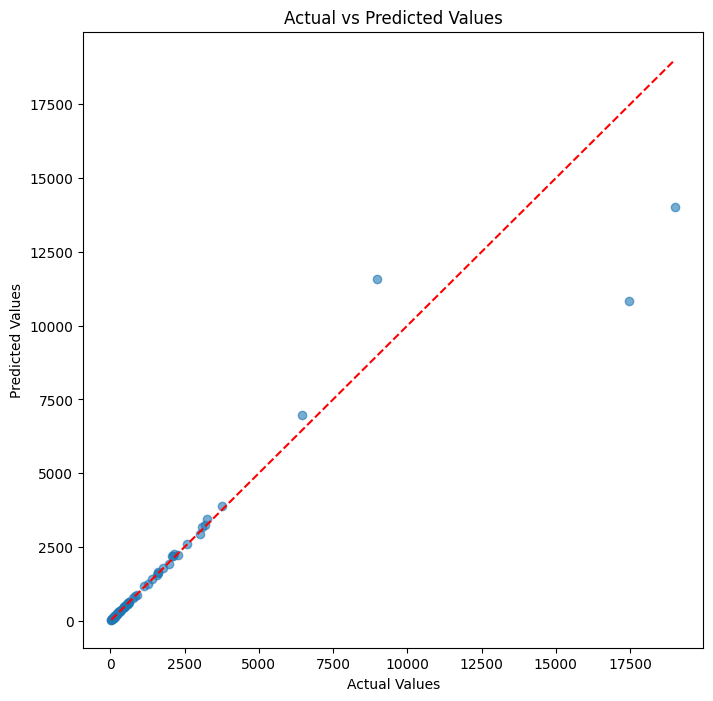

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def demonstrate_model(df, target_column='Previous Close'):
    # Split the data
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plot actual vs predicted
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.show()

# Call the function after feature engineering
demonstrate_model(enhanced_dataframe)
